# `eReef` Direct Access and Use Example

**Author**: Leo Li, Michaela Miller

This notebook demonstrates how to access a public dataset from the RIMReP DMS that is in `zarr` format. We will use the [AIMS - eReefs Aggregations of Hydrodynamic Model Outputs (4km Daily)](https://thredds.ereefs.aims.gov.au/thredds/resources/docs/gbr4.html) dataset as an example.  
  
Throughout this notebook, you will be able to:

     1. Load necessary packages required for data connection and anaylsis
     2. Connect directly to the s3 bucket, load the data and check the size
     3. Priliminary data exploration to view data attributes and metadata
     4. Extracting and plotting temperature and salinity variables at specific locations, times and depths.
     5. Simple calculations using all data to calculate monthly means of temperature for 2022.
     6. Plotting a timeseries for a paritular location
     
There are also examples of how to do simple calculations to plot maps and timeseries.

## 1. Load required packages

In [1]:
# Loading and manipulating gridded multidimensional data
import xarray as xr
# Accessing S3 buckets
import s3fs

## 2. Connecting to the s3 bucket, loading data, and checking sizes
First, you will need to connect directly to the `zarr` dataset in the RIMReP DMS. This is using an `s3` bucket address, and no credentials are needed to access these public data. Following, you will load the `zarr` data file and check the result. As a result, you should see an `xarray.Dataset` that contains dimensions, coordinates, variables, indexes and attributes.

In [2]:
# Path to zarr files
zarr_path = "s3://rimrep-data-public-development/aims-ereefs-agg-hydrodynamic-4km-daily/data.zarr/"

# Connection to public S3 bucket - No credentials needed
fs = s3fs.S3FileSystem(anon=True)

# Loading zarr file
data = xr.open_dataset(s3fs.S3Map(zarr_path, s3=fs), engine="zarr")

# Checking result
data

Next, you can check the data size. To do this, run the following code, and you should get a result of ~605 GB.

In [3]:
# Check data size in GB 
f"Data size: {data.nbytes / 1e9} GB"


'Data size: 615.837645316 GB'

As an `ARCO` (Analysis Ready Cloud Optimized) format, `zarr` allows us to access hundreds of GB (or TB) data in seconds `without downloading them anywhere, anytime and on any device`.

For example, another eReefs dataset [AIMS - eReefs Aggregations of Hydrodynamic Model Outputs (1km Daily)](https://thredds.ereefs.aims.gov.au/thredds/resources/docs/gbr1.html) with higher resolution, has 12 Terabytes (TB), yet we can access it within seconds. To achieve this, we can run a similar code as before, but make sure to change the `s3` bucket address and load the data as `data_1km` so it does not override the previous data.

In [4]:
# Path to zarr files
zarr_path = "s3://rimrep-data-public-development/aims-ereefs-agg-hydrodynamic-1km-daily/data.zarr/"

# Connection to public S3 bucket - No credentials needed
fs = s3fs.S3FileSystem(anon=True)

# Loading zarr file
data_1km = xr.open_dataset(s3fs.S3Map(zarr_path, s3=fs), engine="zarr")

# Check data size in TB (Terabytes)
f"Data size: {data_1km.nbytes / 1e12} TB"

'Data size: 12.681407857192 TB'

## 3. Data exploration
Now, let's briefly explore the [AIMS - eReefs Aggregations of Hydrodynamic Model Outputs (4km Daily)](https://thredds.ereefs.aims.gov.au/thredds/resources/docs/gbr4.html) dataset by simply calling these data. 

If you click the triangle, file or cylinder in the cell outputs, you can see more details about the variables or coordinates of the dataset.

In [5]:
data 

<xarray.Dataset> Size: 616GB
Dimensions:      (time: 4873, latitude: 723, longitude: 491, k: 17)
Coordinates:
  * latitude     (latitude) float64 6kB -28.7 -28.67 -28.64 ... -7.066 -7.036
  * longitude    (longitude) float64 4kB 142.2 142.2 142.2 ... 156.8 156.8 156.9
  * time         (time) datetime64[ns] 39kB 2010-08-31T14:00:00 ... 2024-01-1...
    zc           (k) float64 136B ...
Dimensions without coordinates: k
Data variables:
    eta          (time, latitude, longitude) float32 7GB ...
    mean_cur     (time, k, latitude, longitude) float32 118GB ...
    mean_wspeed  (time, latitude, longitude) float32 7GB ...
    salt         (time, k, latitude, longitude) float32 118GB ...
    temp         (time, k, latitude, longitude) float32 118GB ...
    u            (time, k, latitude, longitude) float32 118GB ...
    v            (time, k, latitude, longitude) float32 118GB ...
    wspeed_u     (time, latitude, longitude) float32 7GB ...
    wspeed_v     (time, latitude, longitude) float32 7GB ...
Attributes: (12/23)
    Conventions:                   CF-1.0
    Parameter_File_Revision:       $Revision: 1753 $
    Run_ID:                        2.1
    Run_code:                      GBR4 Hydro|G0.00|H2.1|S0.00|B0.00
    _CoordSysBuilder:              ucar.nc2.dataset.conv.CF1Convention
    aims_ncaggregate_buildDate:    2024-02-24T01:47:28+10:00
    ...                            ...
    paramhead:                     GBR 4km resolution grid
    prefix_list_puv__:             https://w3id.org/env/puv#
    prefix_list_qudt__:            http://qudt.org/vocab/unit/
    technical_guide_link:          https://eatlas.org.au/pydio/public/aims-er...
    technical_guide_publish_date:  2020-08-18
    title:                         eReefs AIMS-CSIRO GBR4 Hydrodynamic v2 dai...

We can see that these data have four dimensions: `latitude`, `longitude`, `time`, and `zc` (depth).
     
There are nine variables in the dataset: `temp`, `salt`, `mean_cur`, `mean_wspeed` and so on.

You can get more information about all the variables included in the dataset by calling them with the following code:

In [6]:
data.variables

Frozen({'eta': <xarray.Variable (time: 4873, latitude: 723, longitude: 491)> Size: 7GB
[1729880889 values with dtype=float32]
Attributes:
    aggregation:            Daily
    long_name:              Surface elevation
    medium_id:              http://environment.data.gov.au/def/feature/ocean
    positive:               up
    puv__parameter:         https://vocab.nerc.ac.uk/collection/P01/current/A...
    scaledQuantityKind_id:  http://environment.data.gov.au/def/property/sea_s...
    short_name:             eta
    standard_name:          sea_surface_height_above_sea_level
    substanceOrTaxon_id:    http://environment.data.gov.au/def/feature/ocean_...
    unit_id:                http://qudt.org/vocab/unit#Meter
    units:                  metre, 'latitude': <xarray.IndexVariable 'latitude' (latitude: 723)> Size: 6kB
array([-28.696022, -28.666022, -28.636022, ...,  -7.096022,  -7.066022,
        -7.036022])
Attributes:
    _CoordinateAxisType:  Lat
    coordinate_type:      latitude

Alternatively, you can specify one variable by calling their attributes as shown below.

In [7]:
data.mean_cur.attrs

{'aggregation': 'mean_speed',
 'long_name': 'mean_current_speed',
 'medium_id': 'http://environment.data.gov.au/def/feature/ocean',
 'puv__parameter': 'http://vocab.nerc.ac.uk/collection/P01/current/LCEWMP01/',
 'short_name': 'mean_cur',
 'standard_name': 'mean_current_speed',
 'substanceOrTaxon_id': 'http://environment.data.gov.au/def/feature/ocean_current',
 'unit_id': 'http://qudt.org/vocab/unit#MeterPerSecond',
 'units': 'ms-1'}

The `zarr` format has a `self-describe` ability, so anyone could understand data easily. Therefore, checking the metadata of the entire dataset by calling the dataset attributes as shown below will give you all the information regarding these data.

In [8]:
data.attrs

{'Conventions': 'CF-1.0',
 'Parameter_File_Revision': '$Revision: 1753 $',
 'Run_ID': '2.1',
 'Run_code': 'GBR4 Hydro|G0.00|H2.1|S0.00|B0.00',
 '_CoordSysBuilder': 'ucar.nc2.dataset.conv.CF1Convention',
 'aims_ncaggregate_buildDate': '2024-02-24T01:47:28+10:00',
 'aims_ncaggregate_datasetId': 'products__ncaggregate__ereefs__gbr4_v2__daily-monthly/EREEFS_AIMS-CSIRO_gbr4_v2_hydro_daily-monthly-2024-01',
 'aims_ncaggregate_firstDate': '2024-01-01T00:00:00+10:00',
 'aims_ncaggregate_inputs': '[products__ncaggregate__ereefs__gbr4_v2__raw/EREEFS_AIMS-CSIRO_gbr4_v2_hydro_raw_2024-01::MD5:9a148ec09083762a00e41c8444d3d4d5]',
 'aims_ncaggregate_lastDate': '2024-01-17T00:00:00+10:00',
 'bald__isPrefixedBy': 'prefix_list',
 'date_created': 'Wed Feb  7 09:30:39 2024',
 'description': 'Aggregation of raw hourly input data (from eReefs AIMS-CSIRO GBR4 Hydrodynamic v2 subset) to daily means. Also calculates mean magnitude of wind and ocean current speeds. Data is regridded from curvilinear (per input 

## 4. Extracting and Plotting data
Extracting and plotting data is easy with `xarray`, we can do it with a single line of code!

Here, we use the function of `isel()`, which allows us to select a variable by using an index along the specified dimension(s). This function is similar to the `iloc()` of the Python package, Pandas. We could easily access the first date of a variable by `isel(time=0)` if it is unclear when the first time step is for these data. To check this was done properly, the title of the plot should date back to 31 August, 2010.


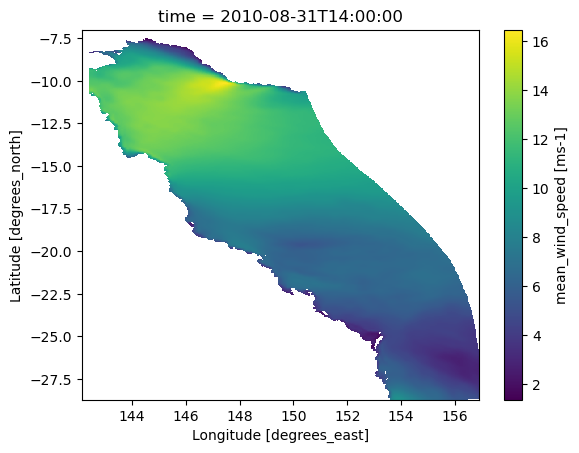

In [9]:
# Plotting mean wind speed for the first time step in the all GBR area
data.mean_wspeed.isel(time=0).plot()

Now, let's do this for another variable (i.e., wind speed), and plot the most recent time step. To do this, select the variable `wspeed_u` and use -1 in `isel(time=-1)` to get the latest time step. To ensure this is done correctly, the title of the plot should update with the most recent time step available.

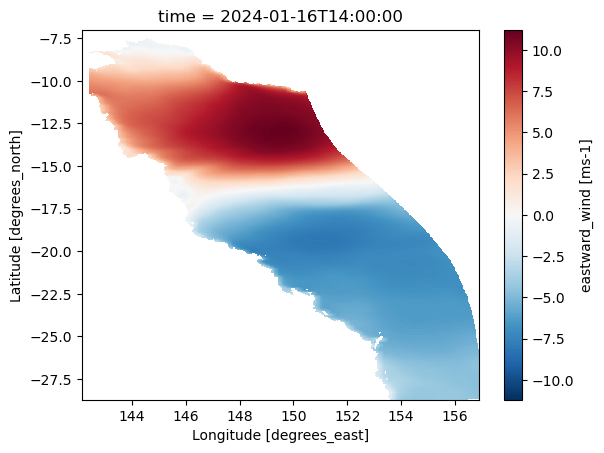

In [10]:
data.wspeed_u.isel(time=-1).plot()

The more you add to the line of the code, the more specific your plots can be. For example, let's plot the most recent mean current speed (`mean_cur`) along the seafloor. You can do this with adding the `sel()` function to the code that allows you to specify dimensions such as depth (k= ). If you are familiar with SQL, this function is quite similar to the `WHERE` function.
The results should be a similar plot to before, but with the `zc` variable described within the title (i.e., -145m).

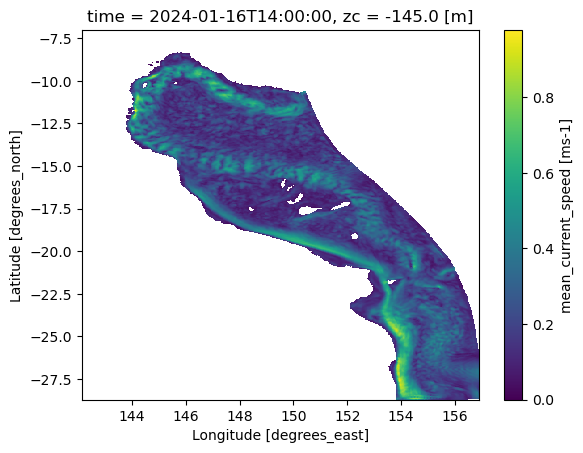

In [11]:
data.mean_cur.isel(time=-1).sel(k=0).plot()

All of the above examples are resulting in mean values for either the first timestep, or the most recent timestep. It is also possible to extract data between a set of dates.

Let's look at the mean current speed (`mean_cur`) for the whole of the GBR area but only for the first week of October 2023. Do this by adding the `time=slice()` function. Then, plot the data.

In [12]:
# Extracting the mean of current speed on sea bottom for all GBR area for the first week of October 2023
mean_current_20231007 = data.sel(time=slice('2023-10-01', '2023-10-07'), k=0).mean_cur

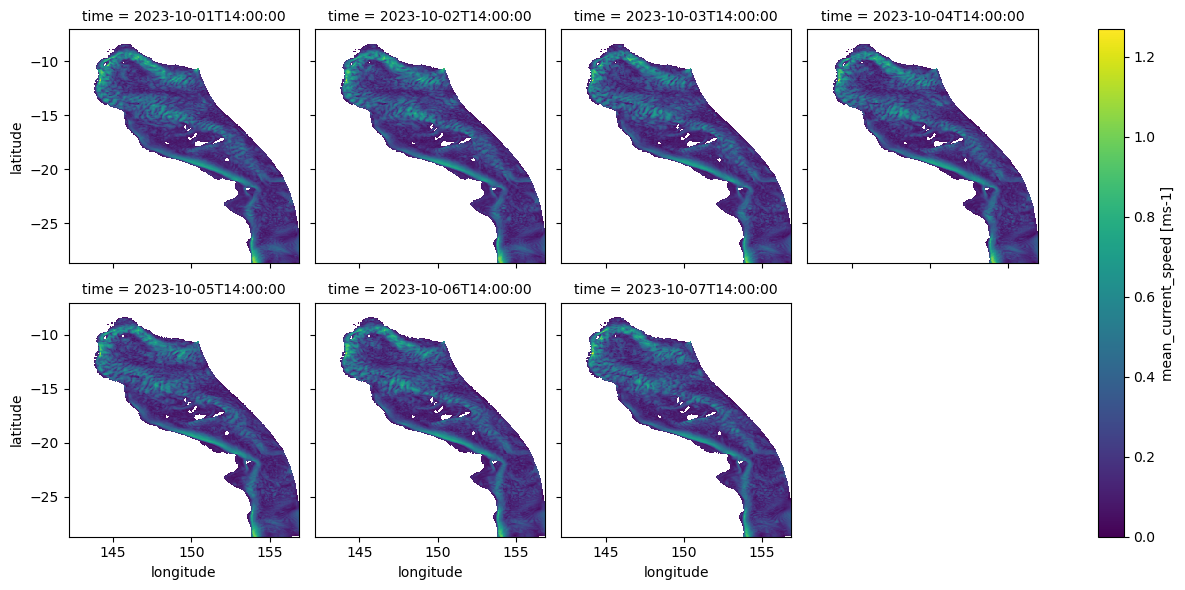

In [13]:
# Plotting the subset
mean_current_20231007.plot(col='time', col_wrap=4)

Now, let's more specific, by adding on a particular location.

This next example will show you how to extract the `temp` variable from the coordinates -19.5, 152 between "2022-01-01" to "2022-12-31". This will narrow down the data we need to handle.

Yet, as we are now becoming more specific with our analysis of these modelled data, it is important to realise there may not be data at every resolution for every datetime or coordinate you are interested in. However, there are ways around this. You have the option to apply several different "methods" to the `sel()` function to indicate which type of scenario you would like to apply to these data:

     1. none (default; "method =" is not in the code) - only exact matches will be returned
     2. "nearest" - uses the nearest valid index value
     3. "pad" or "ffill" - propregates the last valid index value forward
     4. "backfill" or "bfill" - propegates the next valid index value backwards

We suggest using the "nearest" method for these data, which is what is demonstrated below. 

Along that same line of code, we have specified the lat and long that we are interested in.

Next, the `slice()` function was included to indicate which timeframe we are investigating. The `slice()` function reutrns all values inside a datime range (inclusive).

Lastly, the variable was specified (i.e., `temp`).

In [14]:
tempTS_2022 = data.sel(latitude=-19.5, longitude=152, method="nearest")\
    .sel(time=slice('2022-01-01', '2022-12-31'))\
    .temp

Now that you've sliced the data (`tempTS_2022`), let's select the first 10 days of temperature across varying depths to plot.

First specify that you are interested in the first 10 days using the `time=slice()` function. 

Following, using the `plot()` function, specify that you would like to see all the depths (col="k"), and create subplots for each of these depths using `col_wrap=6`. The number here indicates that we want the subplots in rows of 6 - you can alter this to get the visualisation you desire.

This will take around 23 seconds, depending on your internet connection. You should get a grid of plots (17 in total).

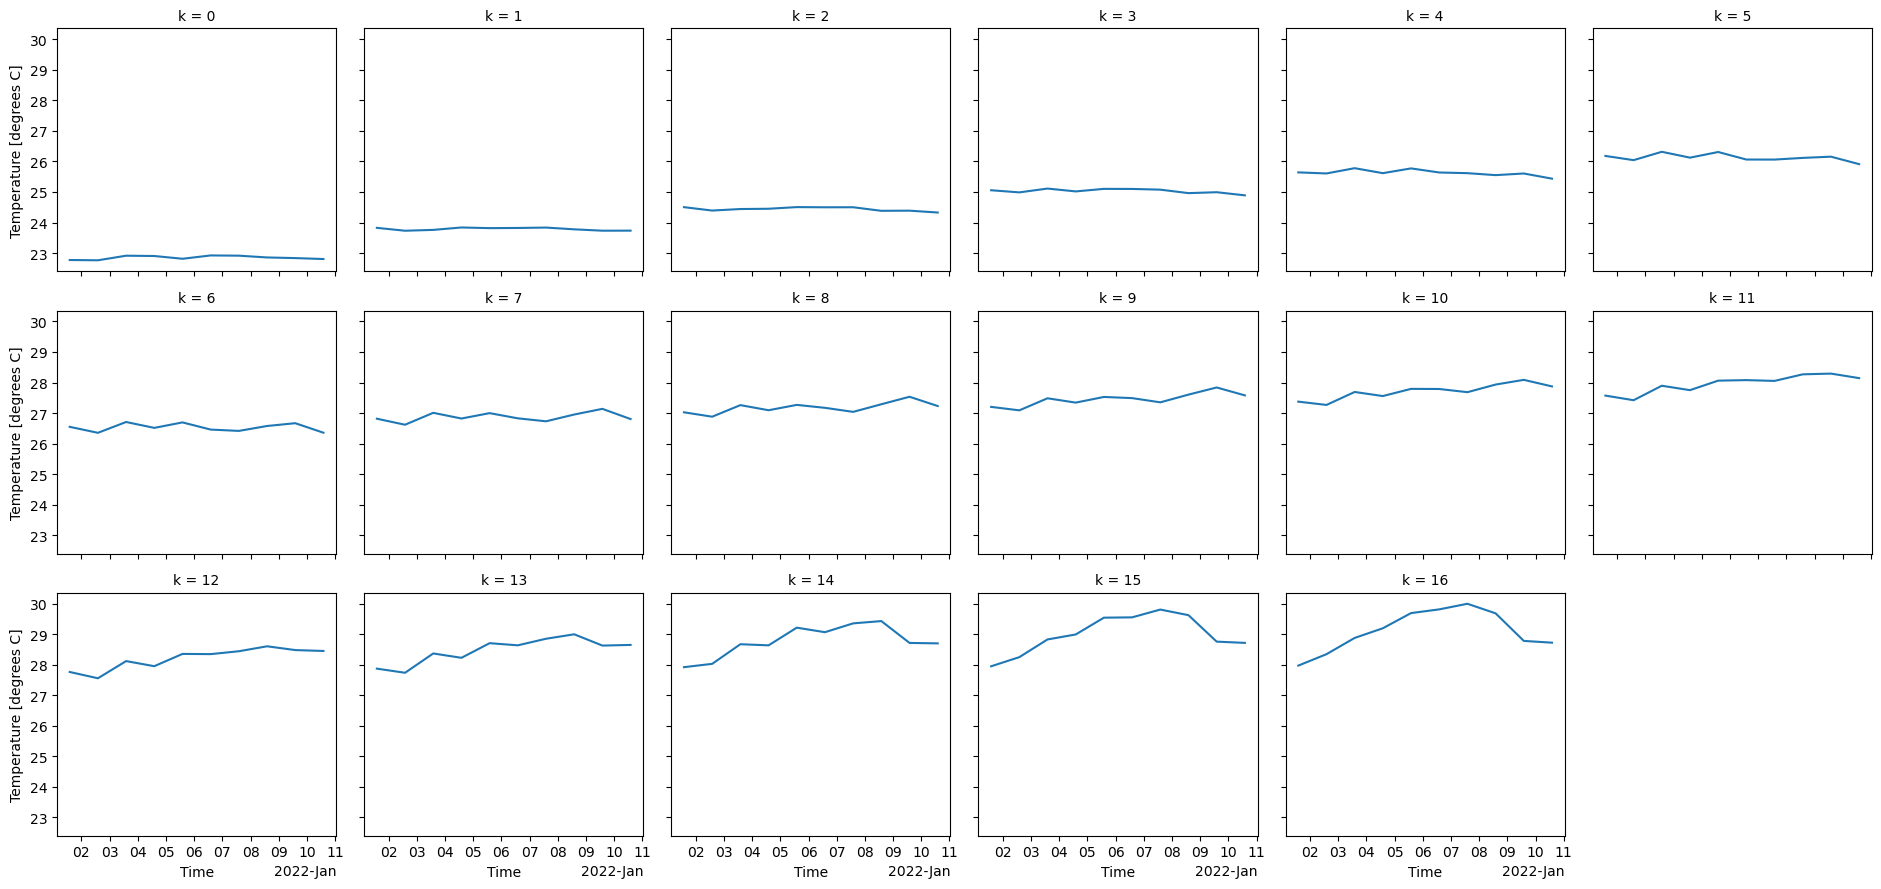

In [15]:
tempTS_2022.isel(time=slice(10)).plot(col="k", col_wrap=6)

Now let's try doing something similar, but using salinity (`salt`) variable from "2022-01-01" to "2023-01-01" at -20, 152 and plot a map.

To begin, you'll need to sub-set the data in a similar fashion as before, but specify the new variable (`salt`) we are interested in.

In [16]:
saltTS_2022 = data.sel(latitude=-20, longitude=152, method="nearest")\
    .sel(time=slice('2022-01-01', '2023-01-01'))\
    .salt

After sub-setting the data down to all of 2022, you can now plot the salinity for the first 10 days across all depths. This time, we've done a differing orientation of plots to make them larger and easier to see.

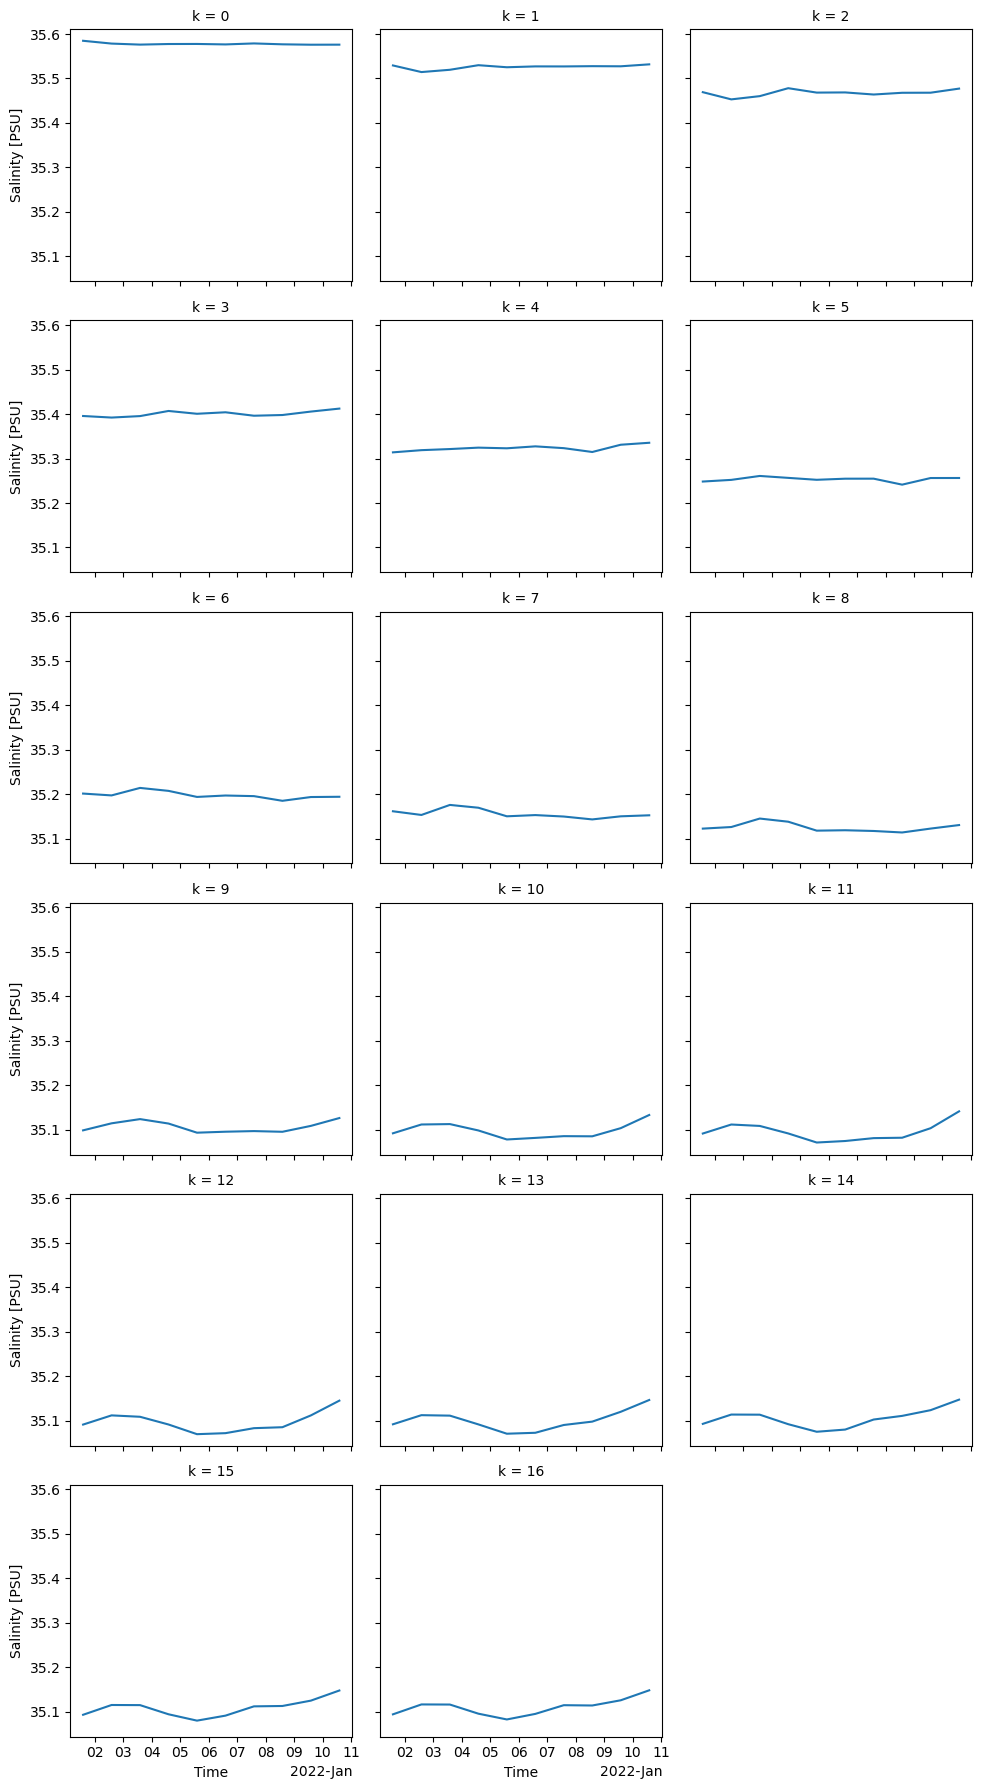

In [17]:
saltTS_2022.isel(time=slice(10)).plot(col="k", col_wrap=3)

## 5. Simple calculations using all data

To conduct some simple calculations, it can be benefitial to create a new variable in the data that you can call to easily. For example, we will show you how to create a new variable containing all `temp` data for just 2022. Then we will demonstrate how to calculate a monthly mean and plot these monthly means at a particular depth.

To begin, name your variable `temp_2022`, and using the `sel()` function, specify that you are interested in the `temp` data from 2022. You can check your result to ensure you see a `xarray.DataArray` just for `temp`.

In [18]:
# Subsetting data
temp_2022 = data.temp.sel(time="2022")

# Checking result
temp_2022

<xarray.DataArray 'temp' (time: 365, k: 17, latitude: 723, longitude: 491)> Size: 9GB
[2202731565 values with dtype=float32]
Coordinates:
  * latitude   (latitude) float64 6kB -28.7 -28.67 -28.64 ... -7.066 -7.036
  * longitude  (longitude) float64 4kB 142.2 142.2 142.2 ... 156.8 156.8 156.9
  * time       (time) datetime64[ns] 3kB 2022-01-01T14:00:00 ... 2022-12-31T1...
    zc         (k) float64 136B ...
Dimensions without coordinates: k
Attributes:
    aggregation:            Daily
    long_name:              Temperature
    medium_id:              http://environment.data.gov.au/def/feature/ocean
    puv__parameter:         https://vocab.nerc.ac.uk/collection/P01/current/T...
    scaledQuantityKind_id:  http://environment.data.gov.au/def/property/sea_w...
    short_name:             temp
    substanceOrTaxon_id:    http://sweet.jpl.nasa.gov/2.2/matrWater.owl#SaltW...
    unit_id:                http://qudt.org/vocab/unit#DegreeCelsius
    units:                  degrees C

Next, we can group the 2022 data by month using the `groupby("time.month")` function and then calculate the monthly mean using the `mean()` function.

This will take some time as it is going through all data to group and calculate means.

In [19]:
# Calculating monthly means
temp_monthly_2022 = temp_2022.groupby("time.month").mean()

# Checking results
temp_monthly_2022

<xarray.DataArray 'temp' (month: 12, k: 17, latitude: 723, longitude: 491)> Size: 290MB
array([[[[      nan,       nan,       nan, ...,       nan,       nan,
                nan],
         [      nan,       nan,       nan, ..., 19.23143 , 19.228935,
          19.217936],
         [      nan,       nan,       nan, ..., 19.219215, 19.224407,
          19.191824],
         ...,
         [      nan,       nan,       nan, ...,       nan,       nan,
                nan],
         [      nan,       nan,       nan, ...,       nan,       nan,
                nan],
         [      nan,       nan,       nan, ...,       nan,       nan,
                nan]],

        [[      nan,       nan,       nan, ...,       nan,       nan,
                nan],
         [      nan,       nan,       nan, ..., 19.755375, 19.752344,
          19.739822],
         [      nan,       nan,       nan, ..., 19.745625, 19.747873,
          19.714113],
...
         [      nan,       nan,       nan, ...,       nan,       nan,
                nan],
         [      nan,       nan,       nan, ...,       nan,       nan,
                nan],
         [      nan,       nan,       nan, ...,       nan,       nan,
                nan]],

        [[      nan,       nan,       nan, ...,       nan,       nan,
                nan],
         [      nan,       nan,       nan, ..., 22.89508 , 22.895288,
          22.894762],
         [      nan,       nan,       nan, ..., 22.902071, 22.89537 ,
          22.898825],
         ...,
         [      nan,       nan,       nan, ...,       nan,       nan,
                nan],
         [      nan,       nan,       nan, ...,       nan,       nan,
                nan],
         [      nan,       nan,       nan, ...,       nan,       nan,
                nan]]]], dtype=float32)
Coordinates:
  * latitude   (latitude) float64 6kB -28.7 -28.67 -28.64 ... -7.066 -7.036
  * longitude  (longitude) float64 4kB 142.2 142.2 142.2 ... 156.8 156.8 156.9
    zc         (k) float64 136B ...
  * month      (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
Dimensions without coordinates: k
Attributes:
    aggregation:            Daily
    long_name:              Temperature
    medium_id:              http://environment.data.gov.au/def/feature/ocean
    puv__parameter:         https://vocab.nerc.ac.uk/collection/P01/current/T...
    scaledQuantityKind_id:  http://environment.data.gov.au/def/property/sea_w...
    short_name:             temp
    substanceOrTaxon_id:    http://sweet.jpl.nasa.gov/2.2/matrWater.owl#SaltW...
    unit_id:                http://qudt.org/vocab/unit#DegreeCelsius
    units:                  degrees C

Notice how the `time` dimension has been replaced by `month`, which includes 12 time steps, one for each month of the year. We can now plot all monthly means for 2022, at a particular depth.

Using the `plot` function, specify `month` in the `col` argument, which will create a subplot for each month in our data. Finally, we use the `col_wrap` argument to specify the number of columns in our plot.

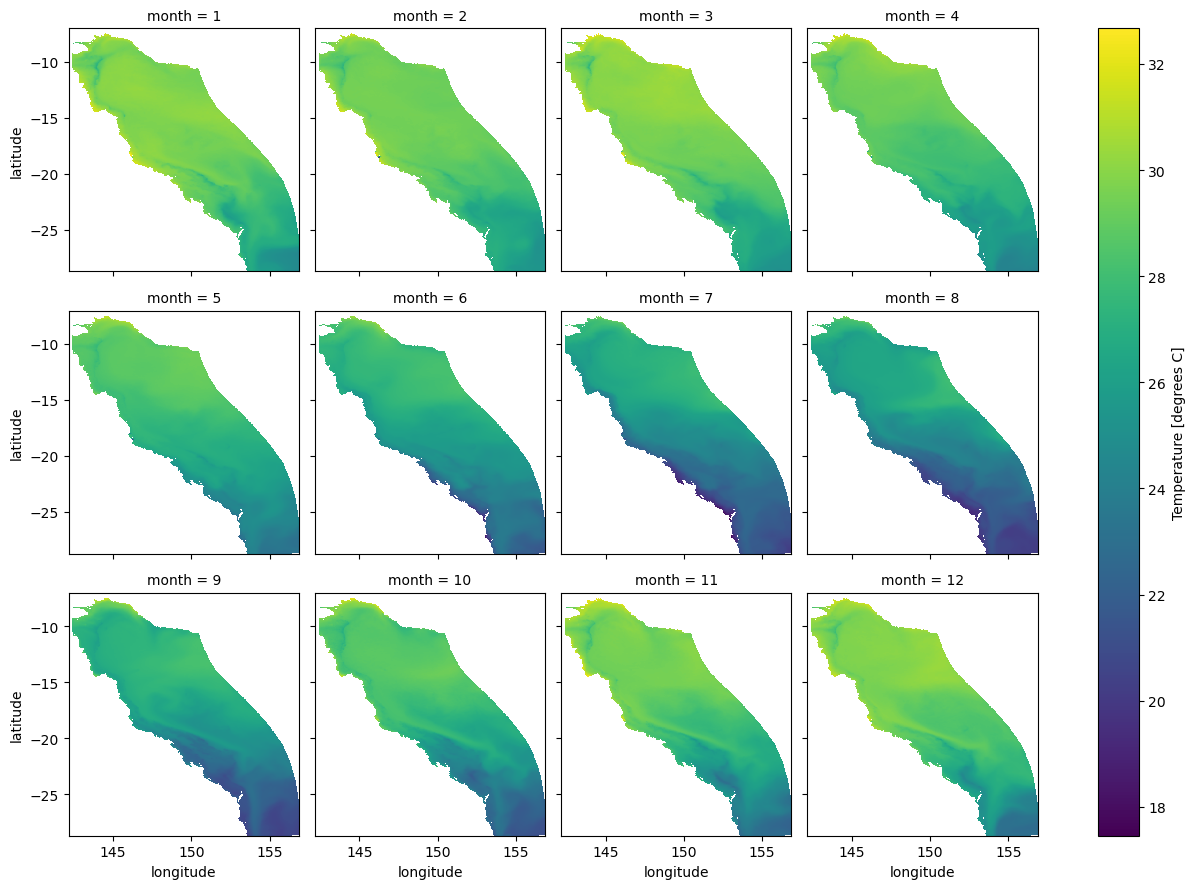

In [20]:
# Plotting monthly means
temp_monthly_2022.sel(k=16).plot(col='month', col_wrap=4)

## 6. Timeseries plotting for a particular location

For this example, we will select a single point in the dataset and extract mean wind speed (`mean_wspeed`) values for a particular timeframe to plot a time series. We will use the `sel()` function to select the point nearest to `latitude` = -20 and `longitude` = 152. We will then subset the data temporally, and plot.  
  
We can do all this for the first 10 months of 2023 using the following line of code:

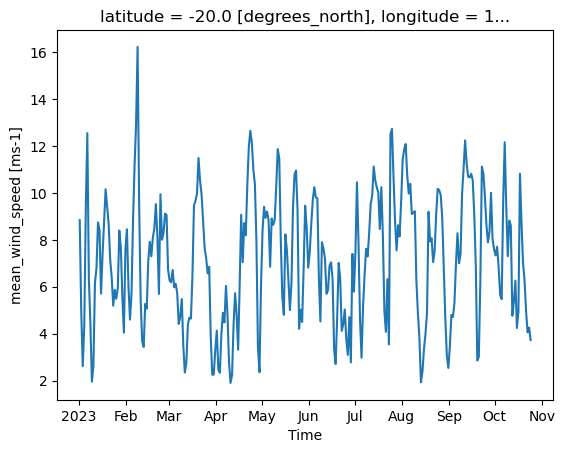

In [21]:
# Plotting the means of wind speed on a location of this year (2023)
data.sel(latitude=-20, longitude=152, method='nearest')\
    .sel(time=slice('2023-01-01', '2023-10-24'))\
    .mean_wspeed.plot()

You can also do this for the month of September for 2023.

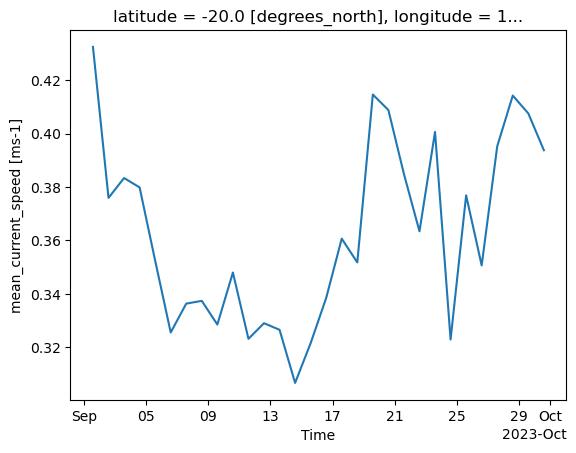

In [22]:
# Plotting the means of current speed on a location of last month (September 2023)
data.sel(latitude=-20, longitude=152, method='nearest')\
    .sel(time=slice('2023-09-01', '2023-09-30'), k=0)\
    .mean_cur.plot()

## 7. Save the data as a CSV

Using the `to_dataframe()` and `to_csv` functions, you can the data as a csv file. The following line of code uses the `mean_cur` from the first week of October (from Section 4) as an example. The same line can be altered with any of the subsetted data we went over (e.g., `temp_monthly_2022`) to save these as well. 

In [52]:
mean_current_20231007.to_dataframe().to_csv("eReef_mean_current_20231007.csv")